# Assignment 1 (shortened)

This notebook contains three exercises from the exercise sets we covered prior to moving the teaching online. It will count as one of the two assignments you need to submit to qualify for the exam. **The deadline** for handing in this assignment is **April 3.** You hand in by pushing your solutions to your folder in the exercise repo.

## Problems from exercise set 2
> **Ex. 2.1.1**: The performance of a random forest classifier is highly sensitive to hyper parameters. Therefore, you should be intimately familiar with what the most important ones do. For each point below, explain what the hyper parameter pertaining to `sklearn.ensemble.RandomForestClassifier` controls, and how setting it either too low or too high (or True/False) might hurt model performance:
1. `n_estimators`
2. `max_depth`
3. `max_features`
4. `bootstrap`

# Solution
    - n_estimators is simply the number of trees in decision trees in the forrest. This also sets the number of samples the data is split into, since every tree is trained on its own sample/featureset.
    - max_depth is the maximum number of leafs (i.e. splits) in each tree in the forrest
    - max_features is the maximum number of featues concidered in each tree
    - bootstrap is a bool changing wheather the whole sample is used for the training of each tree or whether bootstrap sampling is used.

> **Ex. 2.1.2**: For `n_estimators > 1`how should one set the hyper-parameters `max_features` and `bootstrap` so that all the trees in the ensemble end up identical?

# Solution
If max_features are set to the total number of features in the dataset, and bootstrap is false, then the same data and the same (all) features will be used in each tree.

## Problems from exercise set 3

> **Ex. 3.1.2**: Reproduce the figure from the slides that compares PCA, LDA, t-SNE and UMAP as applied to the digits dataset.
1. Do it for the digits dataset (same as in slides)
2. Do it also for the wine dataset. What problems do you observe if you don't standardize the wine dataset? Why is this not a problem with the digits data?
3. Comment on the differences you observe as well as the applicability (and necessity thereof) of different methods for different data.
>
> *Hint: You can use [this class](https://github.com/ulfaslak/ulf_pytools/blob/7f4f1eb7e2d721851c8dacb20904478b19090f2a/ulf.py#L451) for making coloring easier. It lets you create a function that takes a category as input and returns an associated color. Read the docstring for usage example.*

In [5]:
# prerequisits
import pandas as pd
import numpy as np
from sklearn.datasets import load_wine
from sklearn.datasets import load_digits
import matplotlib.pylab as plt
from sklearn.preprocessing import StandardScaler

# Get wine data
data_wine = load_wine()
X_wine = data_wine['data']
y_wine = data_wine['target']

# Get digits data
data_digits = load_digits()
X_digits = data_digits['data']
y_digits = data_digits['target']

# Standardize
sc = StandardScaler()
X_std = sc.fit_transform(X_wine)

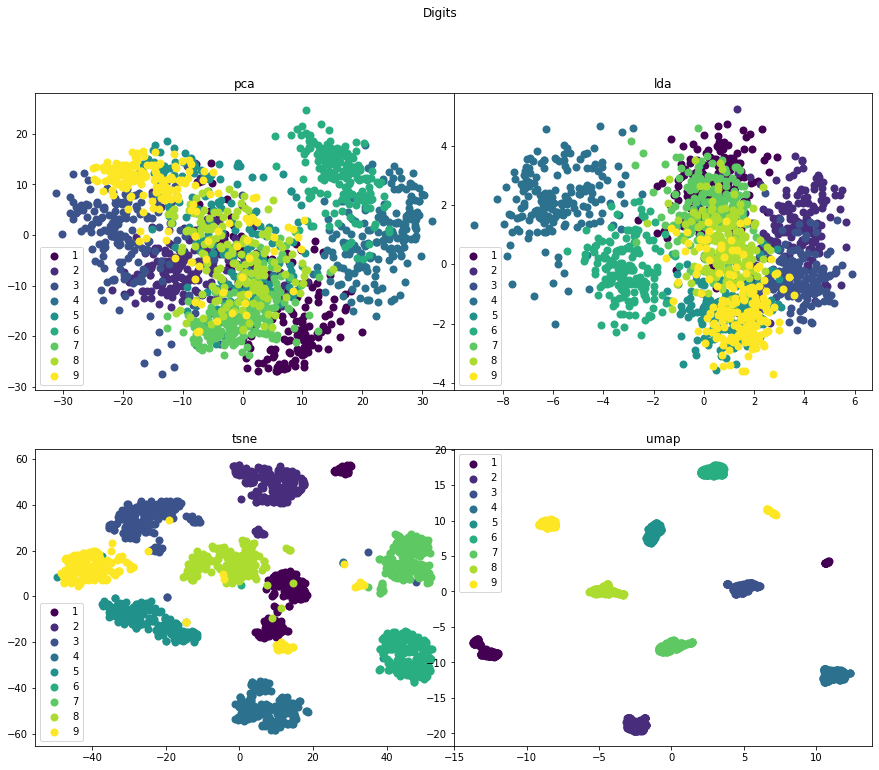

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [2]:
# Solution
# function defs:
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.manifold import TSNE
from umap import UMAP
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import cm


def fit(X,y):
    """Fit pca, lda, tsne and umap
    returns:
        dict of title and data array
    """
    pca = PCA()
    pca_x = pca.fit(X_digits, y_digits).transform(X_digits)

    lda = LinearDiscriminantAnalysis()
    lda_x = lda.fit(X_digits, y_digits).transform(X_digits)

    tsne = TSNE()
    tsne_x = tsne.fit_transform(X_digits, y_digits)

    umap_clf = UMAP()
    umap_x = umap_clf.fit_transform(X_digits, y_digits)
    
    # collect
    methods = {'pca':pca_x, 
           'lda':lda_x,
           'tsne':tsne_x,
           'umap':umap_x}
    return methods


def harryPlotter(clfDict, y, maintitle="", **kwargs):
    """
    params:
        clfDict: a dict wiht title keys and values as arrays of classifier data
        y: target values
    """
    #create figure skeleton
    n_rows = np.ceil(len(clfDict)/2).astype(int)
    fig, axs = plt.subplots(n_rows,2, figsize=(15, 6*n_rows), facecolor='w', edgecolor='k')
    fig.subplots_adjust(hspace = .2, wspace=.0001)
    axs = axs.ravel()

    # mad plots...
    for i, (title,values) in enumerate(clfDict.items()):
        createSubPlots(axs[i], values, y_digits, title)
    
    # add main title
    fig.suptitle(maintitle)

    
def createSubPlots(axs, X, y, title, n_targets=9, **kwargs):
    """Creates subplots needs a single axis
    """
    plt.figure()
    target_names = [i for i in range(1,n_targets+1)]
    colors = [ cm.viridis(x) for x in np.linspace(0,1,n_targets) ]
    for c, target_name in zip(colors, target_names):
        axs.scatter(X[y==target_name,0],
                    X[y==target_name,1],
                    color=c,
                    cmap='viridis',
                    lw=2,
                    label=target_name,
                    **kwargs
                   )
    axs.legend(loc='best', shadow=False, scatterpoints=1)
    axs.set_title(title)
    
# fit
digits = fit(X_digits, y_digits)

# plot
harryPlotter(digits, y_digits, "Digits", alpha=.2)

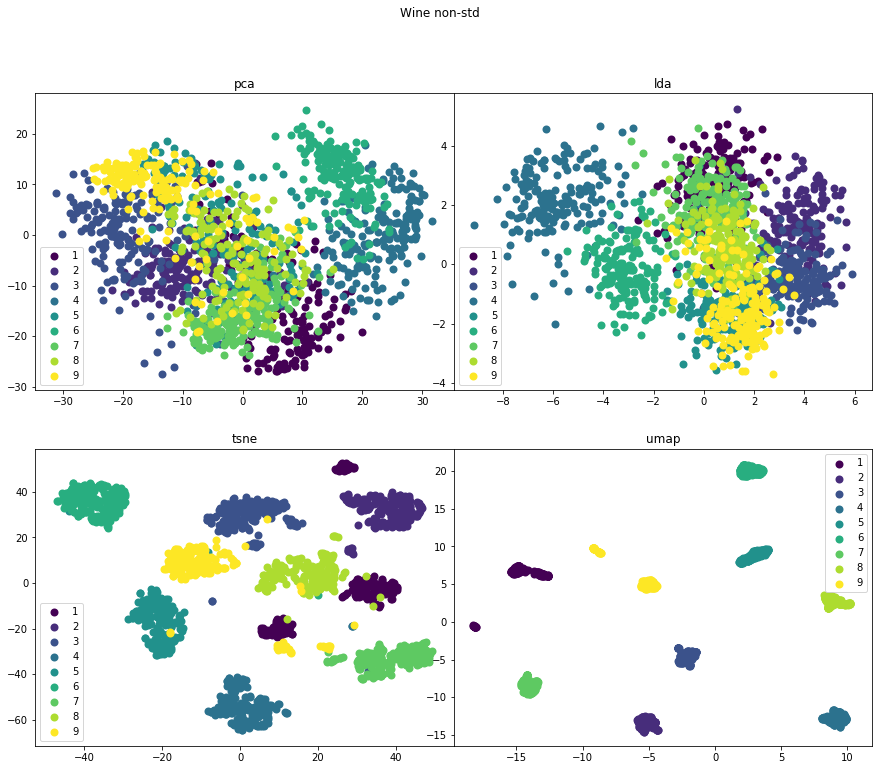

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [3]:
wine_non_std = fit(X_wine, y_wine)
harryPlotter(wine_non_std, y_wine, 'Wine non-std', alpha=.2)

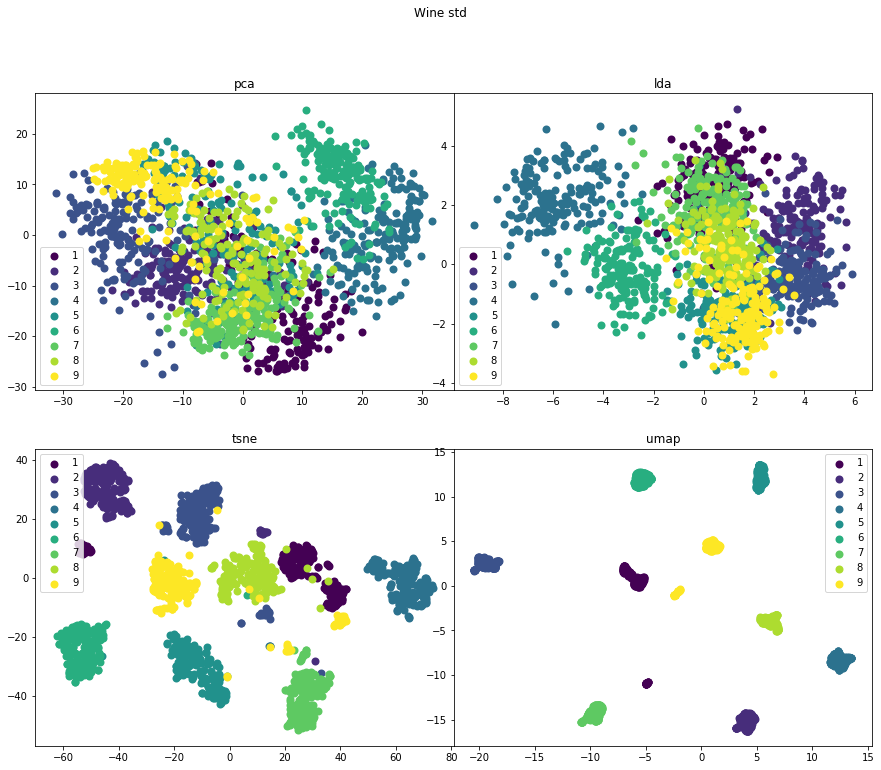

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [6]:
wine_std = fit(X_std, y_wine)
harryPlotter(wine_std, y_wine, 'Wine std', alpha=.2)

## Problems from exercise set 4

In this problem we will try to implement and understand some of the ideas used in [Athey, Imbens (2015)](https://www.pnas.org/content/pnas/113/27/7353.full.pdf) to develop _Honest Inference_ in desicion tree models. The paper begins by covering honesty in a setting of population averages, and for estimating conditional means; so you will need to look towards the second half of the paper to get an impression of it's use for treatment-effect estimation.

> **Ex. 4.2.1:** What does it mean that a tree is _honest?_ In particular what are the implications in terms of 
> * The intuition for why honesty is required in order to get good local treatment effect estimates?
> * The practical implementation of the DT algorithm?

# Solution
- Honesty is when a model does not use the same information for selectingthe model structure as for estimation given a model structure. The implication is directly that the asymptotic effects (of treatment) are the same as if the split was exogenously given. The conditional average treatment effect is therefore unbiased and consistent.

- For decision trees this means splitting the data set and using one part for construction the tree and another for the estimation. This ensures that extreme values are not likely to be bunched up in a single leaf which again implies a broader coverage of the populatipn in each leaf, and thus a broader covarage of local treatment effects.